In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# import talib as ta
from sklearn import neighbors
from sklearn import svm
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Crude Oil - WTI.csv")
df = df.drop(df.columns[[0]], axis=1)
# df = df.iloc[::-1]
df.head()

,Uopen,Ulow,Uhigh,Uclose
0,89.97,88.40,92.84,92.19
1,92.20,90.33,92.45,90.77
2,90.51,90.10,91.78,90.86
3,90.93,90.00,92.05,90.54
4,90.63,88.45,91.67,89.03


In [3]:
N = 2
w = 2*N + 1

for i in range(0,df.shape[0]-1):
    df.loc[df.index[i],'c'] = df['Uclose'][i] - df['Uclose'][i+1]
    
df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c
0,89.97,88.40,92.84,92.19,1.42
1,92.20,90.33,92.45,90.77,-0.09
2,90.51,90.10,91.78,90.86,0.32
3,90.93,90.00,92.05,90.54,1.51
4,90.63,88.45,91.67,89.03,1.55
5,89.06,87.18,89.54,87.48,0.54
6,87.41,85.88,88.11,86.94,0.23
7,87.35,86.36,87.95,86.71,-0.02
8,86.93,85.96,87.90,86.73,1.15
9,87.70,85.10,87.77,85.58,0.77


In [4]:
for i in range(0,df.shape[0]-(2*N+1)):
    s = 0
    for j in range((2*N)+1):
        s += df['Uclose'][i+j]
    s = s*1.0
    s = s/((2*N)+1)
    df.loc[df.index[i+N],'ma'] = s

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma
0,89.97,88.40,92.84,92.19,1.42,NaN
1,92.20,90.33,92.45,90.77,-0.09,NaN
2,90.51,90.10,91.78,90.86,0.32,90.678
3,90.93,90.00,92.05,90.54,1.51,89.736
4,90.63,88.45,91.67,89.03,1.55,88.970


In [5]:
for i in range(0,df.shape[0]-N):
    h = df['Uhigh'][i]
    l = df['Ulow'][i]
    for j in range(N):
        if h<df['Uhigh'][i+j]:
            h = df['Uhigh'][i+j]
        if l>df['Ulow'][i+j]:
            l = df['Ulow'][i+j]
    R = (h - df['Uclose'][i+N])*(-100)/(h-l)
    df.loc[df.index[i+N],'R'] = R
    

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma,R
0,89.97,88.40,92.84,92.19,1.42,NaN,NaN
1,92.20,90.33,92.45,90.77,-0.09,NaN,NaN
2,90.51,90.10,91.78,90.86,0.32,90.678,-44.594595
3,90.93,90.00,92.05,90.54,1.51,89.736,-81.276596
4,90.63,88.45,91.67,89.03,1.55,88.970,-147.317073


In [6]:
for i in range(0,df.shape[0]-N):
    h = 0
    l = 0
    vr = 0
    for j in range(N):
        h += df['Uhigh'][i+j]
        l += df['Ulow'][i+j]
    h = h*1.0/N
    l = l*1.0/N
    x = (df['Uhigh'][i+N] + df['Uclose'][i+N-1])/2
    y = (df['Ulow'][i+N] + df['Uclose'][i+N-1])/2
    if x!=y:
        vr = (h-l)*1.0/(x-y)
    df.loc[df.index[i+N],'VR'] = vr
    

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR
0,89.97,88.40,92.84,92.19,1.42,NaN,NaN,NaN
1,92.20,90.33,92.45,90.77,-0.09,NaN,NaN,NaN
2,90.51,90.10,91.78,90.86,0.32,90.678,-44.594595,3.904762
3,90.93,90.00,92.05,90.54,1.51,89.736,-81.276596,1.853659
4,90.63,88.45,91.67,89.03,1.55,88.970,-147.317073,1.158385
5,89.06,87.18,89.54,87.48,0.54,88.140,-126.944444,2.233051
6,87.41,85.88,88.11,86.94,0.23,87.378,-105.345212,2.502242
7,87.35,86.36,87.95,86.71,-0.02,86.688,-77.322404,2.886792
8,86.93,85.96,87.90,86.73,1.15,86.154,-61.883408,1.969072
9,87.70,85.10,87.77,85.58,0.77,85.630,-119.095477,1.322097


In [7]:
# df['RSI'] = ta.RSI(df['Uclose'].values, timeperiod = N)

# df.head(10)

In [8]:
df['EMA'] = df.iloc[:,3].ewm(span=N,adjust=False).mean()

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA
0,89.97,88.40,92.84,92.19,1.42,NaN,NaN,NaN,92.190000
1,92.20,90.33,92.45,90.77,-0.09,NaN,NaN,NaN,91.243333
2,90.51,90.10,91.78,90.86,0.32,90.678,-44.594595,3.904762,90.987778
3,90.93,90.00,92.05,90.54,1.51,89.736,-81.276596,1.853659,90.689259
4,90.63,88.45,91.67,89.03,1.55,88.970,-147.317073,1.158385,89.583086


In [9]:
M = pd.Series(df['Uclose'].diff(1))  
aM = abs(M) 
r = N+1
s = N+1
EMA1 = M.ewm(span = r, min_periods = r - 1).mean()  
aEMA1 = aM.ewm(span = r, min_periods = r - 1).mean()
EMA2 = EMA1.ewm(span = s, min_periods = s - 1).mean() 
aEMA2 = aEMA1.ewm(span = s, min_periods = s - 1).mean()
TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
df['TSI'] = TSI

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI
0,89.97,88.40,92.84,92.19,1.42,NaN,NaN,NaN,92.190000,NaN
1,92.20,90.33,92.45,90.77,-0.09,NaN,NaN,NaN,91.243333,NaN
2,90.51,90.10,91.78,90.86,0.32,90.678,-44.594595,3.904762,90.987778,NaN
3,90.93,90.00,92.05,90.54,1.51,89.736,-81.276596,1.853659,90.689259,-0.835674
4,90.63,88.45,91.67,89.03,1.55,88.970,-147.317073,1.158385,89.583086,-0.940351
5,89.06,87.18,89.54,87.48,0.54,88.140,-126.944444,2.233051,88.181029,-0.973616
6,87.41,85.88,88.11,86.94,0.23,87.378,-105.345212,2.502242,87.353676,-0.983279
7,87.35,86.36,87.95,86.71,-0.02,86.688,-77.322404,2.886792,86.924559,-0.987672
8,86.93,85.96,87.90,86.73,1.15,86.154,-61.883408,1.969072,86.794853,-0.970532
9,87.70,85.10,87.77,85.58,0.77,85.630,-119.095477,1.322097,85.984951,-0.979006


In [10]:
for i in range(0,df.shape[0]-N-1):
    bs = ''
    for j in range(N+1):
        if df['c'][i+j]>=0:
            bs+= '0'
        else:
            bs+= '1' 
    bs = int(bs, 2)
    if(bs < 2**N):
        bs=0
    else:
        bs=1
    df.loc[df.index[i+N],'y'] = bs

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI,y
0,89.97,88.40,92.84,92.19,1.42,NaN,NaN,NaN,92.190000,NaN,NaN
1,92.20,90.33,92.45,90.77,-0.09,NaN,NaN,NaN,91.243333,NaN,NaN
2,90.51,90.10,91.78,90.86,0.32,90.678,-44.594595,3.904762,90.987778,NaN,0.0
3,90.93,90.00,92.05,90.54,1.51,89.736,-81.276596,1.853659,90.689259,-0.835674,1.0
4,90.63,88.45,91.67,89.03,1.55,88.970,-147.317073,1.158385,89.583086,-0.940351,0.0
5,89.06,87.18,89.54,87.48,0.54,88.140,-126.944444,2.233051,88.181029,-0.973616,0.0
6,87.41,85.88,88.11,86.94,0.23,87.378,-105.345212,2.502242,87.353676,-0.983279,0.0
7,87.35,86.36,87.95,86.71,-0.02,86.688,-77.322404,2.886792,86.924559,-0.987672,0.0
8,86.93,85.96,87.90,86.73,1.15,86.154,-61.883408,1.969072,86.794853,-0.970532,0.0
9,87.70,85.10,87.77,85.58,0.77,85.630,-119.095477,1.322097,85.984951,-0.979006,1.0


In [11]:
df

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI,y
0,89.97,88.40,92.84,92.19,1.42,NaN,NaN,NaN,92.190000,NaN,NaN
1,92.20,90.33,92.45,90.77,-0.09,NaN,NaN,NaN,91.243333,NaN,NaN
2,90.51,90.10,91.78,90.86,0.32,90.678,-44.594595,3.904762,90.987778,NaN,0.0
3,90.93,90.00,92.05,90.54,1.51,89.736,-81.276596,1.853659,90.689259,-0.835674,1.0
4,90.63,88.45,91.67,89.03,1.55,88.970,-147.317073,1.158385,89.583086,-0.940351,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2600,52.17,51.82,52.95,52.77,0.16,52.726,-32.487310,2.106195,52.697205,-0.076332,0.0
2601,52.91,52.29,53.25,52.61,-0.24,52.568,-31.976744,2.968750,52.639068,-0.108152,1.0
2602,52.76,51.85,53.30,52.85,0.51,NaN,-27.972028,1.441379,52.779689,0.069664,0.0
2603,52.65,52.04,53.58,52.34,0.14,NaN,-66.206897,1.564935,52.486563,-0.243815,1.0


In [12]:
df = df.iloc[5:]
df = df.iloc[:2595]


In [13]:
df

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI,y
5,89.06,87.18,89.54,87.48,0.54,88.140,-126.944444,2.233051,88.181029,-0.973616,0.0
6,87.41,85.88,88.11,86.94,0.23,87.378,-105.345212,2.502242,87.353676,-0.983279,0.0
7,87.35,86.36,87.95,86.71,-0.02,86.688,-77.322404,2.886792,86.924559,-0.987672,0.0
8,86.93,85.96,87.90,86.73,1.15,86.154,-61.883408,1.969072,86.794853,-0.970532,0.0
9,87.70,85.10,87.77,85.58,0.77,85.630,-119.095477,1.322097,85.984951,-0.979006,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2595,52.20,51.83,52.61,52.36,-0.62,52.628,-73.500000,2.935897,52.360776,-0.182728,0.0
2596,52.00,51.76,53.13,52.98,-0.26,52.782,47.435897,0.781022,52.773592,0.196225,1.0
2597,53.13,53.05,53.79,53.24,0.11,52.796,8.029197,2.905405,53.084531,0.426647,1.0
2598,52.93,52.75,53.41,53.13,0.86,52.878,-32.512315,3.196970,53.114844,0.393440,1.0


In [14]:
X = df.iloc[:, 5:-1]
y = df.iloc[:, -1]
split = int(len(df)*0.85)
X_train, X_test, y_train, y_test = X[:split], X[split:split+365], y[:split], y[split:split+365]
clf = svm.SVC(kernel = 'poly')
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('accuracy:',confidence)
predictions = clf.predict(X_test)
print('predicted class counts:',Counter(predictions))

accuracy: 0.5972602739726027
predicted class counts: Counter({1.0: 315, 0.0: 50})


In [15]:
X = df.iloc[:, 5:-1]
y = df.iloc[:, -1]
# split = int(len(df)*0.85)
# X_train, X_test, y_train, y_test = X[:split], X[split:split+365], y[:split], y[split:split+365]

# # sc = StandardScaler()
# # X_train = sc.fit_transform(X_train)
# # X_test = sc.transform(X_test)

# clf = svm.SVC(kernel = 'poly')
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print('accuracy:',confidence)
# predictions = clf.predict(X_test)
# print('predicted class counts:',Counter(predictions))
# print(df['c'][1000])
confidence = 0
k=3
clf = svm.SVC(kernel = 'poly')
clf2 = neighbors.KNeighborsClassifier(k)
w=50
predicted_price = []
actual_price = []
days = 1
i=0
while(i<2570):
    if(i+w+days<=2570):
        value=[]
        X_train, y_train = X[i:i+w], y[i:i+w]
        clf.fit(X_train, y_train)
        for k in range(days):
            X_test, y_test = X[i+w+k:i+w+k+1], y[i+w+k:i+w+k+1]
            value.append(clf.score(X_test, y_test))
        
#         confidence +=value

        predictions = clf.predict(X_test)
        clf2.fit(X_train, y_train)
        for k in range(days):
            sum2=0
            count=0
            deltac=0
            for j in range(w):
                if(df['y'][i+j+6]==value[k]):
                    count+=1
                    sum2+=df['c'][i+j+6]
            deltac=sum2/count;
            predicted_price.append(df['Uclose'][i+w+5+k]+deltac)
            actual_price.append(df['Uclose'][i+w+6+k])
            print(str(df['Uclose'][i+w+6+k]) + " entry is " + str(df['Uclose'][i+w+5+k]+deltac))
        i=i+days
            
    else:
        break
        


111.45 entry is 107.64750000000001
112.29 entry is 110.95777777777778
112.28 entry is 111.8157142857143
112.21 entry is 111.82448275862069
112.76 entry is 111.57499999999999
112.86 entry is 112.09818181818183
113.93 entry is 112.34103448275862
113.52 entry is 113.44200000000001
111.05 entry is 113.109
109.24 entry is 110.87896551724138
99.8 entry is 109.06896551724138
97.18 entry is 99.59357142857142
102.55 entry is 96.98814814814816
103.88 entry is 102.47478260869565
98.21 entry is 103.99666666666666
98.97 entry is 98.24954545454545
99.65 entry is 99.04666666666667
97.37 entry is 99.90407407407407
96.91 entry is 97.63142857142857
100.1 entry is 97.16555555555556
98.44 entry is 100.08666666666666
99.49 entry is 98.63296296296296
97.7 entry is 99.41391304347826
99.59 entry is 97.62181818181818
101.32 entry is 99.25090909090909
100.23 entry is 101.50607142857142
100.59 entry is 100.39724137931034
102.7 entry is 100.31136363636364
100.29 entry is 102.99178571428571
100.4 entry is 100.0776

83.32 entry is 83.35761904761905
82.62 entry is 83.62344827586206
83.91 entry is 82.92344827586207
84.03 entry is 84.19933333333333
83.27 entry is 84.48333333333333
84.03 entry is 83.61535714285714
81.8 entry is 84.4403448275862
78.2 entry is 82.285
79.76 entry is 78.69636363636364
79.21 entry is 80.24142857142857
79.36 entry is 79.68904761904761
80.21 entry is 79.84034482758621
77.69 entry is 80.73619047619047
84.96 entry is 78.1703448275862
83.75 entry is 85.50896551724138
87.66 entry is 83.72590909090908
87.22 entry is 88.22620689655172
84.45 entry is 87.3747619047619
85.99 entry is 84.634
83.91 entry is 86.53709677419354
85.81 entry is 84.45709677419354
86.08 entry is 85.99833333333333
87.1 entry is 86.58806451612904
88.43 entry is 87.60806451612903
89.22 entry is 88.82000000000001
89.87 entry is 89.07333333333334
92.66 entry is 89.60318181818182
91.44 entry is 92.45782608695652
88.14 entry is 91.38374999999999
88.5 entry is 88.08375
88.97 entry is 88.38260869565218
89.39 entry is 

107.23 entry is 106.58
105.39 entry is 106.99650000000001
105.49 entry is 105.18947368421053
104.7 entry is 105.339
104.55 entry is 104.53933333333333
103.08 entry is 104.47619047619047
105.03 entry is 102.82107142857143
107.89 entry is 104.73954545454545
106.94 entry is 107.67275862068965
106.56 entry is 106.74266666666666
105.3 entry is 106.3415
104.37 entry is 105.10266666666666
103.4 entry is 104.18241379310345
105.97 entry is 103.21241379310345
106.11 entry is 105.57454545454546
106.83 entry is 105.94862068965517
106.85 entry is 106.68275862068965
107.33 entry is 106.69166666666666
107.46 entry is 107.20966666666666
107.1 entry is 107.34299999999999
104.96 entry is 107.04133333333333
103.85 entry is 104.90133333333333
105.03 entry is 103.79133333333333
106.42 entry is 104.6504761904762
105.92 entry is 106.41379310344827
109.01 entry is 105.8303448275862
110.1 entry is 108.56904761904762
108.8 entry is 109.95724137931033
107.65 entry is 108.70033333333333
106.75 entry is 107.550333

93.65 entry is 94.3071875
93.35 entry is 93.77588235294118
93.86 entry is 93.44999999999999
93.88 entry is 93.96
94.55 entry is 94.21181818181817
95.96 entry is 94.918125
95.83 entry is 95.88
92.88 entry is 96.198125
95.54 entry is 92.9561111111111
94.45 entry is 95.61611111111111
93.29 entry is 94.763125
92.66 entry is 93.42500000000001
92.75 entry is 92.79499999999999
91.67 entry is 92.88499999999999
92.83 entry is 91.99129032258065
92.27 entry is 92.89684210526316
92.92 entry is 92.603
94.88 entry is 92.951
94.42 entry is 95.11413793103448
93.07 entry is 94.68535714285714
92.41 entry is 93.18045454545454
91.52 entry is 92.52952380952381
91.56 entry is 91.63952380952381
92.8 entry is 91.7475
92.53 entry is 93.02896551724137
93.54 entry is 92.75896551724138
94.57 entry is 93.727
91.16 entry is 94.94238095238094
90.73 entry is 91.34758620689655
91.01 entry is 91.06095238095239
89.74 entry is 91.34095238095239
90.34 entry is 89.91785714285714
88.85 entry is 90.60904761904762
87.31 entry

44.43 entry is 45.78310344827587
45.23 entry is 44.47428571428571
45.09 entry is 45.324285714285715
44.74 entry is 45.128214285714286
45.54 entry is 44.845909090909096
46.26 entry is 45.64590909090909
48.53 entry is 46.267407407407404
47.81 entry is 48.55217391304348
49.43 entry is 47.700869565217396
49.63 entry is 49.35777777777778
47.1 entry is 49.630833333333335
46.66 entry is 47.0212
46.64 entry is 46.65875
46.38 entry is 46.63875
47.26 entry is 46.378750000000004
45.89 entry is 47.153076923076924
45.55 entry is 45.783076923076926
45.2 entry is 45.57208333333333
45.38 entry is 45.23478260869565
44.6 entry is 45.41478260869565
43.98 entry is 44.46925925925926
43.2 entry is 44.07434782608696
45.94 entry is 43.314090909090915
46.06 entry is 45.65
46.59 entry is 46.04954545454546
46.14 entry is 46.59956521739131
47.9 entry is 46.075833333333335
46.32 entry is 47.67111111111111
45.2 entry is 46.184615384615384
44.29 entry is 45.52695652173914
43.87 entry is 44.459545454545456
44.21 entr

48.24 entry is 47.565
48.81 entry is 47.96370370370371
48.69 entry is 48.54785714285715
49.83 entry is 48.39758620689655
50.44 entry is 49.81285714285714
49.81 entry is 50.178333333333335
51.35 entry is 49.47866666666667
50.79 entry is 51.349000000000004
50.18 entry is 50.48903225806451
50.44 entry is 50.221
50.35 entry is 50.483333333333334
49.94 entry is 50.089
50.29 entry is 49.9547619047619
51.6 entry is 50.32714285714285
50.43 entry is 51.342666666666666
50.85 entry is 50.20033333333333
50.52 entry is 50.950476190476195
49.96 entry is 50.337931034482764
49.18 entry is 50.09136363636364
49.72 entry is 49.28217391304348
48.7 entry is 49.860416666666666
46.86 entry is 48.84041666666667
46.67 entry is 46.778076923076924
45.34 entry is 46.812400000000004
44.66 entry is 45.2772
44.07 entry is 44.56708333333333
44.89 entry is 43.94565217391305
44.98 entry is 44.98555555555556
45.27 entry is 44.848749999999995
44.66 entry is 45.168400000000005
43.41 entry is 44.61038461538461
43.32 entry 

57.17 entry is 56.63866666666667
56.74 entry is 57.03625
56.76 entry is 56.52794117647059
55.7 entry is 56.69647058823529
55.33 entry is 55.54575757575758
55.14 entry is 55.28055555555555
56.55 entry is 55.01894736842105
56.09 entry is 56.484210526315785
56.83 entry is 55.855312500000004
58.02 entry is 56.71
58.38 entry is 57.81967741935484
58.95 entry is 58.16129032258065
58.11 entry is 58.75903225806452
57.99 entry is 57.92875
57.3 entry is 57.88368421052632
57.4 entry is 57.19578947368421
58.36 entry is 57.253
57.47 entry is 58.283
57.62 entry is 57.323
55.96 entry is 57.532413793103444
56.69 entry is 55.851
57.36 entry is 56.58103448275862
57.99 entry is 57.233666666666664
57.14 entry is 57.88666666666667
56.6 entry is 56.92631578947368
57.04 entry is 56.51741935483871
57.3 entry is 56.957419354838706
57.16 entry is 57.23129032258064
57.46 entry is 57.084062499999995
58.09 entry is 57.21052631578947
58.36 entry is 57.9925806451613
58.47 entry is 58.28645161290323
58.59 entry is 58.

52.61 entry is 51.85818181818182
51.0 entry is 53.093333333333334
51.65 entry is 51.487931034482756
51.15 entry is 52.1805
52.58 entry is 51.58344827586207
51.2 entry is 53.0395
49.88 entry is 51.67931034482759
46.24 entry is 50.439
47.2 entry is 46.799
45.88 entry is 47.672631578947374
45.59 entry is 46.42933333333334
42.53 entry is 46.0535
43.16 entry is 43.025263157894734
46.22 entry is 43.56222222222222
44.61 entry is 46.7290625
45.33 entry is 45.15064516129032
45.41 entry is 45.699999999999996
45.89 entry is 45.949677419354835
46.54 entry is 46.42967741935484
47.09 entry is 46.69
47.96 entry is 47.209500000000006
48.52 entry is 48.024
49.78 entry is 48.478
52.36 entry is 49.61714285714286
52.59 entry is 52.19409090909091
51.59 entry is 52.474782608695655
50.51 entry is 51.52458333333334
52.11 entry is 50.444583333333334
52.31 entry is 52.53038461538461
52.07 entry is 52.256800000000005
53.8 entry is 51.95230769230769
53.65 entry is 54.189166666666665
54.24 entry is 53.514814814814

63.27 entry is 62.93363636363636
62.7 entry is 63.10571428571429
59.61 entry is 62.64793103448276
59.56 entry is 59.557931034482756
59.04 entry is 59.50793103448276
58.08 entry is 59.03857142857143
58.23 entry is 58.050714285714285
57.81 entry is 58.16703703703703
58.52 entry is 57.8204347826087
58.54 entry is 58.53347826086957
59.27 entry is 58.43925925925926
58.73 entry is 59.18703703703704
58.34 entry is 58.66392857142857
56.74 entry is 58.27392857142858
55.59 entry is 56.70666666666667
54.19 entry is 55.55666666666667
53.14 entry is 54.08461538461538
53.48 entry is 53.034615384615385
53.33 entry is 53.812916666666666
52.14 entry is 53.239230769230765
51.56 entry is 52.0552
50.11 entry is 51.4752
49.61 entry is 50.009166666666665
50.75 entry is 49.503478260869564
50.95 entry is 50.99703703703704
50.32 entry is 50.87416666666667
49.57 entry is 50.2772
49.94 entry is 49.6225
51.17 entry is 50.16222222222222
51.42 entry is 51.24739130434783
52.05 entry is 51.46791666666667
52.36 entry 

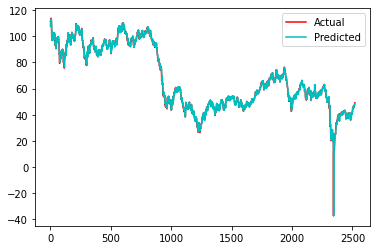

In [16]:
plt.plot(actual_price, "r", label = "Actual")
plt.plot(predicted_price, "c", label = "Predicted")
plt.legend()
plt.show()

In [17]:
import math
rmse = 0
for i in range(len(actual_price)):
    rmse += (actual_price[i] - predicted_price[i])**2
rmse = rmse/len(actual_price)
rmse = math.sqrt(rmse)

print(rmse)

2.017155709890409
